# 2강 실습

### 1) 웹 크롤링을 통한 데이터 수집

## **🔍 Objectives**

### **1. 실습 개요**
- 🌐 **웹 크롤링 실습**   
- 🔄 **CSV 데이터 처리 실습**  

---

### **2. 실습 진행 목적 및 배경**
- 본 실습에서는 **정적 페이지와 동적 페이지 웹 크롤링**을 실습하며, 다양한 라이브러리의 활용법을 배웁니다.  
- **JSON, CSV, XML**과 같은 다양한 데이터 포맷의 구조를 이해하고 이를 변환하거나 저장하는 방법을 학습합니다.  
- 학습자는 데이터를 수집, 처리, 저장하는 유연한 워크플로우를 체득하게 됩니다.  

---

### **3. 실습 수행으로 얻어갈 수 있는 역량**
- 실시간 데이터를 **수집**하고 **분석**하는 기술 습득  
- 데이터를 다룰 때 **포맷 변환 및 저장 능력** 향상  
- **Selenium**, **BeautifulSoup** 등 웹 크롤링 라이브러리 활용 능력 향상  


---

### **4. 실습 핵심 내용**
- 💻 **동적 웹 크롤링 실습** (Selenium 활용)  


### **Prerequisites**

```
selenium>=4.0.0
webdriver-manager>=3.8.5
beautifulsoup4>=4.9.3
requests>=2.25.1
lxml>=4.6.2

```

### 웹 크롤링 실습

- HTML 구조 실습


In [3]:
html_doc ='''<html><head><title>웹크롤링 연습</title></head>
<body>
<p class="title"><b><h1>HTML 연습</h1></b></p>
<p class="link">인터넷 링크를 작성하는 방법은
<a class="naver" href='https://sports.news.naver.com/wfootball/index' id="link1">네이버 스포츠 뉴스</a>와
<a class="daum" href="https://sports.daum.net/worldsoccer" id="link2">다음 스포츠 뉴스</a>처럼
HTML 링크로 작성할 수 있습니다.
</p>
<p class="story">그리고 HTML 문서는 글자의 크기도 조정 가능해서
<h2>크게</h2>작성할 수도 있고, <h4>작게</h4> 작성할 수도 있습니다.
</p>
</body></html>
'''

with open('웹크롤링 연습.html','w',encoding='utf-8') as f:
  f.write(html_doc)

- 코드 작성 이후 실행하고 코랩 탐색기에서 '웹크롤링 연습.html'을 다운받아서 실행해보기
- 각 링크를 보며 어떤 구조로 연결이 되었는지 생각해보기
- HTML 태그에 따른 구조를 생각하며 보기

<hr>

# 1. BeautifulSoup

### 1-1. bs4 설치

In [4]:
# bs4를 import로 사용하기 위해 설치

!pip install bs4

     -------------------------------------- 147.9/147.9 KB 2.2 MB/s eta 0:00:00


You should consider upgrading via the 'C:\Users\skdud\AppData\Local\Programs\Python\Python39\python.exe -m pip install --upgrade pip' command.


- HTML 구조 실습에서 작성해서 저장한 html 문서를 다시 불러들여 문서를 파싱하여 사람이 이해하기 쉬운 언어로 변환하고 필요한 정보를 추출하는 과정

### 1-2. 문서 파싱(parsing)

- 앞서 저장한 html 문서를 다시 읽어들여 html 태그의 형태를 그대로 유지하면서 파싱하는 방법인 BeautifulSoup 클래스를 사용하여 읽는다.

- 이를 사람이 식벽ㄹ하기 좋게 태그 단위로 출력하는 prettify 메소드를 활용한다.

In [8]:
# bs4 모듈에서 BeautifulSoup 클래스를 import 하고 bs라는 약칭으로 사용
from bs4 import BeautifulSoup as bs

# 이전에 생성한 HTML 파일('웹크롤링 연습.html)을 읽기 모드('r')로 열기
with open('웹크롤링 연습.html', 'r',encoding='utf-8') as f:
    # HTML파일의 내용을 읽어와서 변수 html_doc에 저장
    html_doc = f.read()

# BeautifuleSoup 객체 생성 - html_doc을 'html.parser'를 사용하여 파싱
soup = bs(html_doc,'html.parser')

# BeautifulSoup 객체 출력(HTML 구조를 그대로 출력)
print(soup)

# prettify() 메서드를 사용해 HTML 문서를 들여쓰기 및 정리하여 출력
print(soup.prettify())

<html><head><title>웹크롤링 연습</title></head>
<body>
<p class="title"><b><h1>HTML 연습</h1></b></p>
<p class="link">인터넷 링크를 작성하는 방법은
<a class="naver" href="https://sports.news.naver.com/wfootball/index" id="link1">네이버 스포츠 뉴스</a>와
<a class="daum" href="https://sports.daum.net/worldsoccer" id="link2">다음 스포츠 뉴스</a>처럼
HTML 링크로 작성할 수 있습니다.
</p>
<p class="story">그리고 HTML 문서는 글자의 크기도 조정 가능해서
<h2>크게</h2>작성할 수도 있고, <h4>작게</h4> 작성할 수도 있습니다.
</p>
</body></html>

<html>
 <head>
  <title>
   웹크롤링 연습
  </title>
 </head>
 <body>
  <p class="title">
   <b>
    <h1>
     HTML 연습
    </h1>
   </b>
  </p>
  <p class="link">
   인터넷 링크를 작성하는 방법은
   <a class="naver" href="https://sports.news.naver.com/wfootball/index" id="link1">
    네이버 스포츠 뉴스
   </a>
   와
   <a class="daum" href="https://sports.daum.net/worldsoccer" id="link2">
    다음 스포츠 뉴스
   </a>
   처럼
HTML 링크로 작성할 수 있습니다.
  </p>
  <p class="story">
   그리고 HTML 문서는 글자의 크기도 조정 가능해서
   <h2>
    크게
   </h2>
   작성할 수도 있고,
   <h4>
    작게
   </h4>
   작성할 수도 있습니다.


- prettify()를 사용해 출력시키면 태그의 시작과 종료 위치, 상위 및 하위 태그의 종속 관계를 이해하기 쉬워진다.

- 여기서 저장한 soup 객체는 html 태그가 그대로 살아있어서 이 태그들의 특성을 이용해 필요한 정보를 추출할 수 있다.

In [9]:
# soup 객체에서 모든 <p> 태그를 찾은 후 반복문을 통해 텍스트만 출력
for p in soup.find_all('p'):
    # 찾은 <p> 태그의 텍스트 내용을 출력
    print(p.text)

# soup 객체에서 CSS 선택자 'p'를 사용하여 <p> 태그를 찾은 후 텍스트 출력
for p in soup.select('p'):
    # 찾은 <p> 태그의 텍스트 내용을 출력
    print(p.text)

HTML 연습
인터넷 링크를 작성하는 방법은
네이버 스포츠 뉴스와
다음 스포츠 뉴스처럼
HTML 링크로 작성할 수 있습니다.

그리고 HTML 문서는 글자의 크기도 조정 가능해서
크게작성할 수도 있고, 작게 작성할 수도 있습니다.

HTML 연습
인터넷 링크를 작성하는 방법은
네이버 스포츠 뉴스와
다음 스포츠 뉴스처럼
HTML 링크로 작성할 수 있습니다.

그리고 HTML 문서는 글자의 크기도 조정 가능해서
크게작성할 수도 있고, 작게 작성할 수도 있습니다.



- 결과를 보면 soup 객체의 메소드인 title과 태그명들을 활용하여 필요한 부분만 정보를 추출할 수 있다.

- find_all, select 함수를 이용하는 방법이 필요한 부분의 정보를 추출하는데 더 효율적이다.


### 1-3. find 함수 활용

- **find**함수는 태그, 속성과 속성값을 활용해서 HTML 문서의 텍스트를 추출할 수 있다.

- **find_all**함수는 여러 개의 내용을 리스트 형태로 가져올 수 있으며, 특정 하나의 태그만을 추출하려면 find 함수를 사용한다.

- 태그 내의 **class**혹은 **id** 등에 해당하는 속성과 속성값을 활용하여 해당 태그의 내용을 추출할 수 있다.

In [18]:
# soup 객체에서 모든 <p>태그를 찾아 리스트 형태로 출력
print("모든 <p>태그 :", soup.find_all('p'))

# soup 객체에서  첫 번째 <p> 태그를 찾아 출력
print("첫번째 <p>태그 : ", soup.find('p'))

# soup 객체에서 속성이 'class'이고 값이 'python'인 요소를 찾아 출력
print(soup.find(attrs={'class':'python'}))

# soup 객체에서 태그가 'a'이고, 속성 'id'가 'link1'인 요소를 찾아 출력
print(soup.find('a',{'id':'link1'}))

# soup 객체에서 속성이 'id'이고 값이 'link2'인 요소를 찾아 출력
print(soup.find(attrs={'id':'link2'}))

모든 <p>태그 : [<p class="title"><b><h1>HTML 연습</h1></b></p>, <p class="link">인터넷 링크를 작성하는 방법은
<a class="naver" href="https://sports.news.naver.com/wfootball/index" id="link1">네이버 스포츠 뉴스</a>와
<a class="daum" href="https://sports.daum.net/worldsoccer" id="link2">다음 스포츠 뉴스</a>처럼
HTML 링크로 작성할 수 있습니다.
</p>, <p class="story">그리고 HTML 문서는 글자의 크기도 조정 가능해서
<h2>크게</h2>작성할 수도 있고, <h4>작게</h4> 작성할 수도 있습니다.
</p>]
첫번째 <p>태그 :  <p class="title"><b><h1>HTML 연습</h1></b></p>
None
<a class="naver" href="https://sports.news.naver.com/wfootball/index" id="link1">네이버 스포츠 뉴스</a>
<a class="daum" href="https://sports.daum.net/worldsoccer" id="link2">다음 스포츠 뉴스</a>


- 기본적으로 태그 명을 사용하고, 여기에 클래스나 아이디 등의 속성과 그에 해당하는 속성 값을 넣어 해당 태그의 텍스트를 추출할 수 있다.

- 실제 값을 추출할 경우, find_all은 여러 개의 결과를 반환하므로, 각 결과를 처리하기 위해 for문을 사용한다.

- find의 경우는 단일값을 가지고 있기 때문에 속성값을 추출할 때는 get 함수를 이용하고, 태그에 둘러싸여 있는 텍스트를 추출하고자 할 때는 text 메소드를 활용하면 된다.

In [20]:
# 첫 번째 <p> 태그 내부에서 <h1>태그를 찾아 텍스트 출력
print(soup.find('p').find('h1').text)

# 첫 번째 <p> 태그의 'class' 속성 값을 가져와 출력
print(soup.find_all('p')[0].get('class'))

HTML 연습
['title']


### 1-4. CSS선택자(Selector)이용 : select 함수

- CSS(Cascading Style Sheets)에서 선택자는 디자인 스타일을 적용하고자 하는 HTML요소를 선택할 때 사용된다.

- 다양한 종류가 있으며 여러 개의 선택자를 통해서 하나의 태그를 공통으로 제어할 수 있다.

- 태그 선택자, 클래스 선태갖, 아이디 선택자가 있다.

- 우선 적용 순위로는 조금 더 구체적인 선택자가 우선순위로 적용된다.

- find_all 함수와 같은 기능으로는 select 함수(여러 개의 시리즈)

- find 함수와 같은 기능으로는 select_one 함수(하나의 태그)

In [27]:
# CSS 선택자 'p'를 사용하여 모든 <p> 태그를 리스트 형태로 출력
print(soup.select('p'))

# CSS 선택자 'p'를 사용하여 첫 번째 <p>태그를 찾아 출력
print("첫 번째 CSS 선택자 : ",soup.select_one('p'))

# 클래스 이름이 'title'인 요소를 찾아 출력 (CSS 선택자 사용)
print("클래스 이름이 title 요소 : ",soup.select_one('.title'))

# 클래스 이름이 'python'인 요소를 찾아 출력
print("클래스 이름이 python인 요소 : ",soup.select_one('.python'))

# 태그 'a'와 id='link1' 속성을 가진 요소를 찾아 출력(CSS 선택자 사용)
print(soup.select_one('a#link1'))

# id='link2' 속성을 가진 요소를 찾아 출력
print(soup.select_one('#link2'))

[<p class="title"><b><h1>HTML 연습</h1></b></p>, <p class="link">인터넷 링크를 작성하는 방법은
<a class="naver" href="https://sports.news.naver.com/wfootball/index" id="link1">네이버 스포츠 뉴스</a>와
<a class="daum" href="https://sports.daum.net/worldsoccer" id="link2">다음 스포츠 뉴스</a>처럼
HTML 링크로 작성할 수 있습니다.
</p>, <p class="story">그리고 HTML 문서는 글자의 크기도 조정 가능해서
<h2>크게</h2>작성할 수도 있고, <h4>작게</h4> 작성할 수도 있습니다.
</p>]
첫 번째 CSS 선택자 :  <p class="title"><b><h1>HTML 연습</h1></b></p>
클래스 이름이 title 요소 :  <p class="title"><b><h1>HTML 연습</h1></b></p>
클래스 이름이 python인 요소 :  None
<a class="naver" href="https://sports.news.naver.com/wfootball/index" id="link1">네이버 스포츠 뉴스</a>
<a class="daum" href="https://sports.daum.net/worldsoccer" id="link2">다음 스포츠 뉴스</a>


- find 함수와 다른 문법상 'class','id'태그를 '.'과 '#'으로 대체하여 사용하며, 기능은 동일하다.

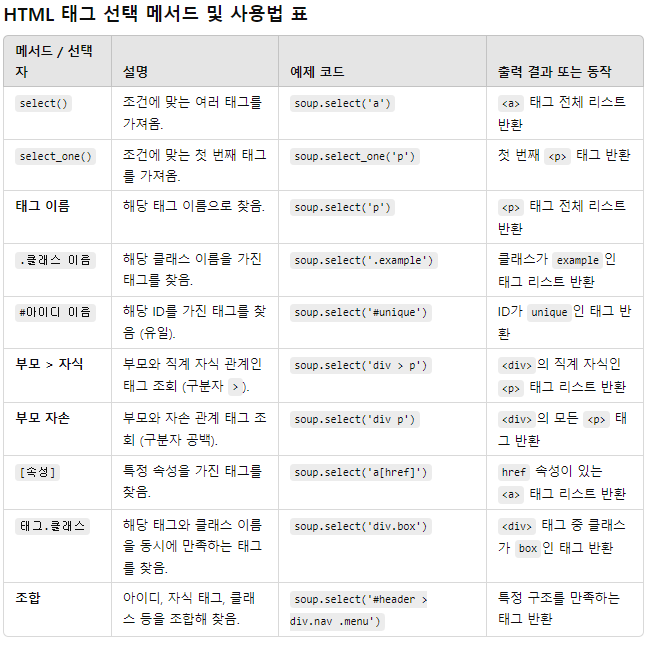

출처 : https://pythonblog.co.kr/coding/11/#google_vignette/

In [30]:
# 첫 번째 <p> 태그 내부에 있는 id='link1' 요소의 텍스트 출력
print(soup.select_one('p > #link1').text)

# 두 번째 <a> 태그의 'id' 속성 값을 가져와 출력
print(soup.select('a')[1].get('id'))

# 두 번째 <p> 태그의 텍스트 내용을 출력
print(soup.select('p')[1].text)

네이버 스포츠 뉴스
link2
인터넷 링크를 작성하는 방법은
네이버 스포츠 뉴스와
다음 스포츠 뉴스처럼
HTML 링크로 작성할 수 있습니다.



<hr>

# Requests,Urllib

### 2-1. robots.txt로 확인

- 네이버 뉴스의 크롤링 가능 여부 : https://news.naver.com/robots.txt

In [1]:
import requests

# 로봇 배제 기준 확인(robots.txt 파일 가져오기)
resp = requests.get('https://news.naver.com/robots.txt')
print(resp.text)

User-agent: Yeti
Allow: /main/imagemontage
Disallow: /

User-Agent: facebookexternalhit
Disallow: /*/template

User-Agent: Twitterbot
Disallow: /*/template

User-agent: *
Disallow: /



- 3가지의 User-Agent 제외하고 모든 부분에 대해 허용

### 2-2. Requests

- 데이터 전송시 딕셔너리 형태로 주고 받기에 별도로 디코딩 과정이 필요 없음
- get 메소드로 해당 웹 페이지 정보 읽기 가능
- 수신한 HTML 문서에 대한 encoding이나 headers 정보를 간단하게 파악 가능
- 모든 텍스트 정보를 확인하기 위해 간단하게 text 메서드 활용

In [3]:
import requests

# 웹 페이지에 GET 요청을 보냄
r = requests.get('https://news.naver.com/')

# 인코딩 방식 출력
print('Encoding : ', r.encoding)

# 헤더에서 'Expires' 정보 출력
print('Expires:', r.headers.get('Expires'))

# 헤더에서 'Content-Type' 정보 출력
print('Content-Type:', r.headers.get('Content-Type'))

# 전체 헤더 정보 출력
print('\nHeaders:')
print(r.headers)

Encoding :  utf-8
Expires: None
Content-Type: text/html;charset=utf-8

Headers:
{'date': 'Tue, 17 Dec 2024 10:58:03 GMT', 'cache-control': 'no-cache, no-store', 'x-xss-protection': '1; mode=block', 'x-content-type-options': 'nosniff', 'x-frame-options': 'SAMEORIGIN', 'content-language': 'ko-KR', 'vary': 'Accept-Encoding', 'content-encoding': 'gzip', 'access-control-allow-credentials': 'true', 'access-control-allow-headers': 'accept, content-type', 'access-control-allow-methods': 'GET, POST', 'content-length': '40563', 'content-type': 'text/html;charset=utf-8', 'referrer-policy': 'unsafe-url', 'server': 'nfront'}


- 본인의 개인 블로그에 접근하는 방법
- 아이디와 패스워드 입력

- requests + bs4의 select활용

In [7]:
import requests
from bs4 import BeautifulSoup as bs

# 웹 페이지 요청
response = requests.get('https://ai-bigdataanalysis.blogspot.com/2024/03/html.html')

# HTML 파싱
html_doc = response.text
soup = bs(html_doc, 'html.parser')

# 특정 div 태그 선택
content = soup.select_one('div.post-body')

# 텍스트 추출 (중복 제거)
text_set= set()  # 중복 제거를 위해 set 사용
if content:
    for para in content.select("span"):
        text_set.add(para.text.strip()) # 중복 제거

# 정렬 및 줄바꿈 추가
text = "\n".join(sorted(text_set))

# 최종 텍스트 출력
print(text)


!
"class"
"p"
'''<p class='para'>빅데이터 분석과 활용</p>'''
'html.parser'
1. HTML 구조의 이해
2.HTML 문서의 사례와 텍스트 추출
3. 웹크롤링 방법 사례
<html><head><title>웹크롤링 연습</title></head><body><p class="title"><b><h1>HTML 연습</h1></b></p><p class="link">인터넷 링크를 작성하는 방법은<a class="blog" href='https://ai-bigdataanalysis.blogspot.com/' id="link1">인공지능 기반 덱스트 데이터 분석 블로그</a>와<a class="wikidocs" href="https://wikidocs.net/book/6280" id="link2">인공지능 기반 빅데이터 자연어 처리와 통계 분석</a>처럼HTML 링크로 작성할 수 있습니다.</p><p class="story">그리고 HTML 문서는 글자의 크기도 조정 가능해서<h2>크게</h2>작성할 수도 있고, <h4>작게</h4> 작성할 수도 있습니다.</p></body></html>위에 있는 소스코드로 작성된 HTML 파일을 웹브라우저로 열면 아래와 같은 형태의 웹페이지로 출력됨을 알 수 있다. 특히 여기서 인공지능 기반 덱스트 데이터 분석 블로그와 인공지능 기반 빅데이터 자연어 처리와 통계 분석의 경우는 a 태그에서 href 속성을 이용한 링크로 연결되어 다른 웹페이지로 이동할 수 있다.
HTML은 웹 문서를 만들기 위하여 사용하는 기본적인 웹 언어의 한 종류이다. 하이퍼텍스트를 작성하기 위해 개발되었으며 인터넷 서비스의 하나인 월드와이드웹(WWW)을 통해서 볼 수 있는 문서를 만들 때 사용하는 웹 언어의 한 종류이다. 특히 인터넷에서 웹을 통해 접근되는 대부분의 웹 페이지들은 HTML로 작성되는데 문서의 글자 크기, 글자색, 글자모양, 그래픽, 문서이동(하이퍼링크) 등을 정의하는 명령어들이 있다. HTML에서 사용하는 명

### 2-3. urllib

- requests 라이브러리와 다르게 데이터 전송시 바이너리 데이터로 변환하여 주고 받기에 HTML 문서를 수신했을 때 디코딩 과정이 필요하다.

- 한글은 UTF-8, EUC-KR, cp949 형태가 존재

- HTML 문서의 Head 부분에서 관련된 정보를 찾아 적절한 포맷에 맞게 디코딩을 해야한다.

In [8]:
# urllib.request 모듈에서 urlopen 함수를 import
from urllib.request import urlopen

# 웹 페이지 요청 및 응답 객체 가져오기
# 'https://ai-bigdataanalysis.blogspot.com'페이지에 접근하여 응답 객체를 html 변수에 저장
html = urlopen('https://ai-bigdataanalysis.blogspot.com')

# 응답된 페이지의 인코딩 방식 확인
# 서버에서 응답한 HTP 헤더에서 'Content-Type'의 charset값을 가져와 인코딩 방식을 출력
print("Encoding:", html.headers.get_content_charset())

# HTML 내용을 읽어와서 디코딩(기본적으로 UTF-8로 인코딩된 경우)
# 서버로부터 받은 데이터를 바이너리 형식으로 읽어온 후, 문자열로 디코딩하여 저장
html_doc=html.read().decode()

# 디코딩된 HTML 문서의 처음 200자를 출력
# HTML 소스의 일부를 출력하여 페이지 구조를 확인
print(html_doc[:200])

Encoding: utf-8
<!DOCTYPE html>
<html class='v2' dir='ltr' lang='ko'>
<head>
<link href='https://www.blogger.com/static/v1/widgets/3566091532-css_bundle_v2.css' rel='stylesheet' type='text/css'/>
<meta content='width


- UTF-8이 아닌 EUC-KR이나 cp949일경우 decode('cp949')로 변경
- urllib과 bs4의 find 문 활용한 웹 크롤링 방식